### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([98,124,183,248,249,250,251,252,253,254,255,257,445,692,732,982,2481,2646,2846,2904,2905,2906,2907,2908,2910,2911,2912,2913,2914,2915,2916,2917,3086,3195,3362,3556,3557,3558,3858,3868,3946,4055,4120,4121,4122,4160,4347,4453,4575,5213,5464,5641,6025,6055,6135,6136,6139,6141,6142,6143,6202,6313,6314,6343,6345,6346,6560,6613,6718,6846,6957,7120,7216,7217,7219,7488,7784,7919,7920,8045,8100,8135,8136,8565,8740,8786,8979,9274,9390,9705,9760,9826,9947,9986,10053,10127,10292,10314,10406,10450,10562,10626,11520,11703,11785,13630,13841,13842,13843,14221,14333,14364,14648,15182,15657,15659,15915,16123,16271,16287,16519,16520,16693,16791,16847,16852,16861,17126,17160,17202,17205,17430,17475,17491,17492,17523,17527,17569,17578,17807,17820,17888,18021,18088,18111,18282,18289,18559,18560,18579,18630,18632,18637,19039,19052,19053,19124,19453,19722,20150,20433,20708,20709,20710,20711,20790,20792,20793,20800,20862,20869,20874,20875,20909,20910,20911,20912,20913,20914,20915,20916,20917,20918,20919,20920,20921,20922,20923,20924,20925,20989,20992,20994,21140,21462,21463,21510,21832,21833,21902,21927,21928,21929,21930,21931,21932,21933,21934,21935,21936,21937,21938,21939,21940,21941,21942,22509,22697,22976,23017,23269,23291,23324,23612,23748,23799,23800,23801,23802,23803,23869,23870,23871,23977,24080,24082,24083,24085,24089,24097,24098,24101,24108,24110,24111,24317,24318,24504,24617,24936,24988,25426,25503,25504,25594,25622,25672,25963,26022,26350,26522,26527,26819,27426,27430,27611,27655,27713,28017,28188,28307,28308,28309,28723,28726,28786,28834,29258,29292,29363,30027,30088,30136,30828,30829,30938,30979,31345,31346,31362,31570,31971,32182,32423,32514,32865,33219,33294,33346,33546,33648,33650,33794,33804,33849,34002,34065,34392,34405,34416,34489,34493,34496,34497,34503,34505,34551,34624,34626,34812,35040,35068,35252,35523,35575,35789,35963,36054,36262,36473,36474,36492,36596,36776,37009,37017,37018,37019,37241,37578,37586,37721,37787,38501,38502,38503,38504,38569,38595,38596,38622,38673,38700,38709,39201,39255,39354,39446,39521,39560,39568,39685,39709,39808,39885,39888,39891,39907,40156,40160,40185,40333,40338,40340,40341,40409,40467,40652,40659,40722,40792,40876,40915,40916,40917,40936,40938,40963,40981,41013,41099,41284,41427,41734,41787,41788,41789,41790,41791,41792,41854,42264,42269,42270,42273,42288,42289,42409,42546,42669,42712,42938,43048,43126,43138,43150,43159,43161,43162,43165,43166,43167,43169,43171,43172,43173,43174,43176,43177,43179,43181,43182,43183,43186,43189,43190,43192,43193,43194,43198,43202,43324,43333,43334,43335,43337,43339,43340,43341,43343,43344,43345,43347,43348,43349,43353,43354,43357,43509,43604,43611,43645,43868,43986,43992,44014,44102,44302,44715,44752,44794,44796,44797,44798,44986,44987,45333,45359,45462,46651,46666,46906,46907,46910,47016,47053,47170,47346,47784,47806,47850,47851,47860,47980,47981,48070,48191,48306,48319,48408,48441,48847,48848,48914,48918,48969,49099,49113,49277,49307,49323,49325,49327,49328,49482,49692,49967,50007,50039,50100,50126,50376,50776,50791,50990,51121,51214,51456,51712,51868,51907,51908,51909,51910,51911,51912,52038,52067,52234,52267,52876,53080,53081,53108,53379,53381,53383,53455,53463,53599,53696,53745,53874,53896,54120,54317,54548,54715,54966,55206,55269,55616,55619,55630,55681,55682,55688,55690,55691,55693,55695,55697,55698,55767,56375,56472,56475,56868,56869,56870,56873,56943,57029,57080,57106,57719,57984,58049,58199,58526,58539,58590,58953,58998,59132,59211,59212,59213,59214,59217,59218,59219,59220,59221,59222,59223,59224,59250,59356,59443,59444,59445,59446,59447,59490,59491,59563,59884,60159,60167,60175,60294,60584,60643,60705,60767,60861,60949,60953,61016,61231,61232,61418,61468,61571,62382,62798,62850,62851,62852,62940,63042,63154,63329,63361,63407,63458,63459,63474,63491,63543,63699,63707,63736,63807,64070,64710,64878,64879,64880,64882,64883,64885,64886,64887,64888,64889,65181,65652,66073,66111,66311,66313,66318,66319,66560,66617,68493,68526,68891,68924,68942,69358,69371,69412,69871,70167,70226,70627,70799,70820,70841,70922,71072,71123,71133,71189,71556,71564,71565,71566,71654,71835,71949,71950,72037,72345,72347,72374,72663,72840,72944,72949,73099,73390,73557,73661,73785,73921,73966,73994,74167,74225,74416,74516,74585,74731,74771,75100,75122,75159,75161,75163,75249,75291,75336,75373,75554,75606,75615,75759,75851,75875,76012,76052,76170,76200,76363,76392,76432,76446,76489,76518,76608,76921,77048,77049,77141,77147,77210,77218,77533,77711,77880,77971,78247,78260,78431,78949,79158,79188,79225,79307,79315,79434,79470,79490,79491,79585,79612,79620,79627,79628,79744,79817,79920,79955,79965,79966,80058,80061,80091,80179,80180,80181,80182,80183,80184,80185,80213,80214,80241,80424,80469,80470,80471,80538,80551,80621,80750,80755,80773,80816,80817,80822,80823,80840,80843,80884,80921,80922,80924,80987,81278,81306,81307,81404,81416,81618,81625,81665,81672,81884,82082,82273,82557,82673,82881,82887,83250,83430,83486,83979,84095,84104,84105,84174,84240,84247,84394,84469,84996,84997,85199,85200,85203,85204,85253,85257,85554,85644,85752,85902,85909,85916,85961,85970,86018,86377,86505,86698,86747,87067,87379,87383,87502,87662,87858,87897,87965,88066,88078,88079,88090,88558,88561,88678,88853,88939,88944,88945,88947,88949,88979,89113,89305,89306,89391,89562,89624,89786,89900,89974,90159,90204,90259,90299,90300,90424,90495,90540,90577,90578,90583,90673,90973,91076,91077,91112,91150,91154,91277,91345,91562,91563,91685,91765,91815,91817,91837,92068,92277,92438,92462,92617,92649,92924,93004,93017,93018,93221,93292,93457,93458,93459,93462,93792,93803,93834,94124,94156,94200,94201,94240,94505,94545,94659,94664,95050,95099,95177,95258,95303,95339])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(964, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(464166,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

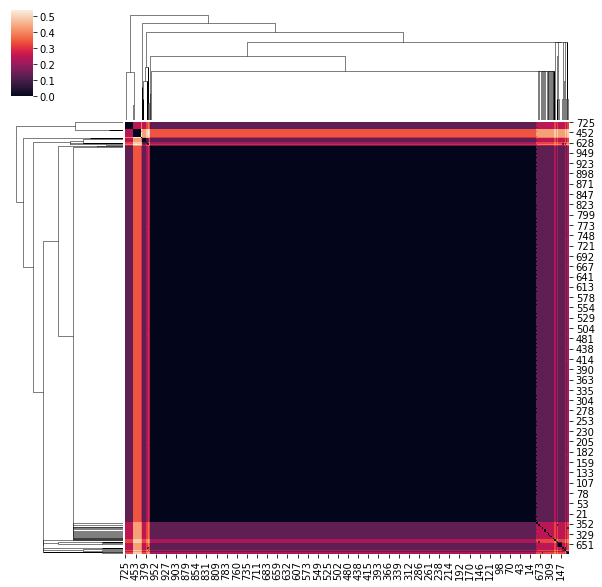

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

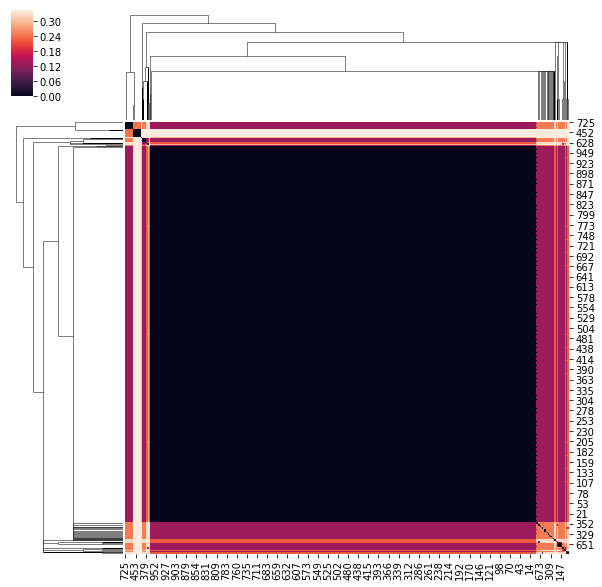

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

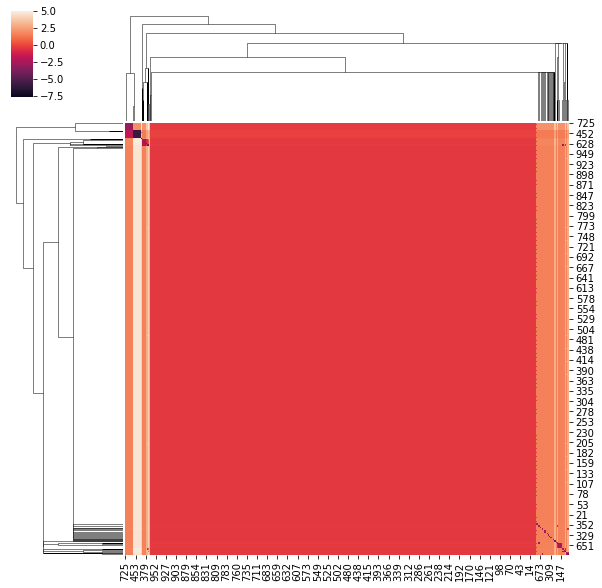

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

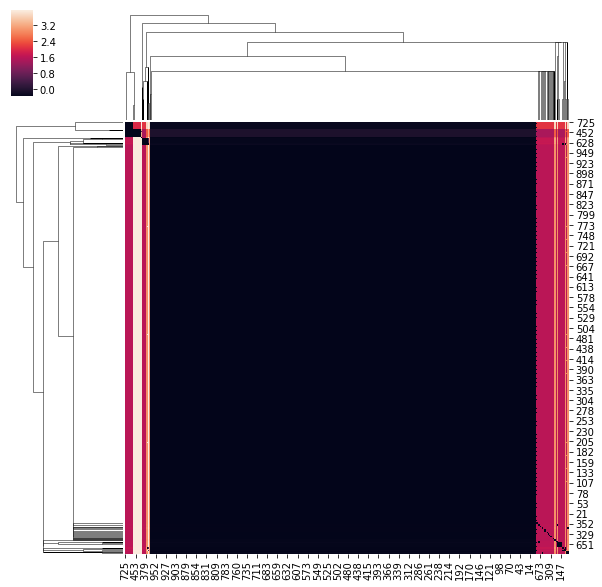

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)